In [1]:
%matplotlib inline
import os.path  
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite

db_path = "Resources/hawaii.sqlite"

engine = create_engine(f"sqlite:///{db_path}")

# data= engine.execute("SELECT * FROM hawaii.sqlite")
# for record in data:
#     print(record)

# os.path.exists("hawaii.sqlite")


In [5]:
# # reflect an existing database into a new model
base = automap_base()
# # reflect the tables
base.prepare(engine, reflect = True)


In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


2016-08-23


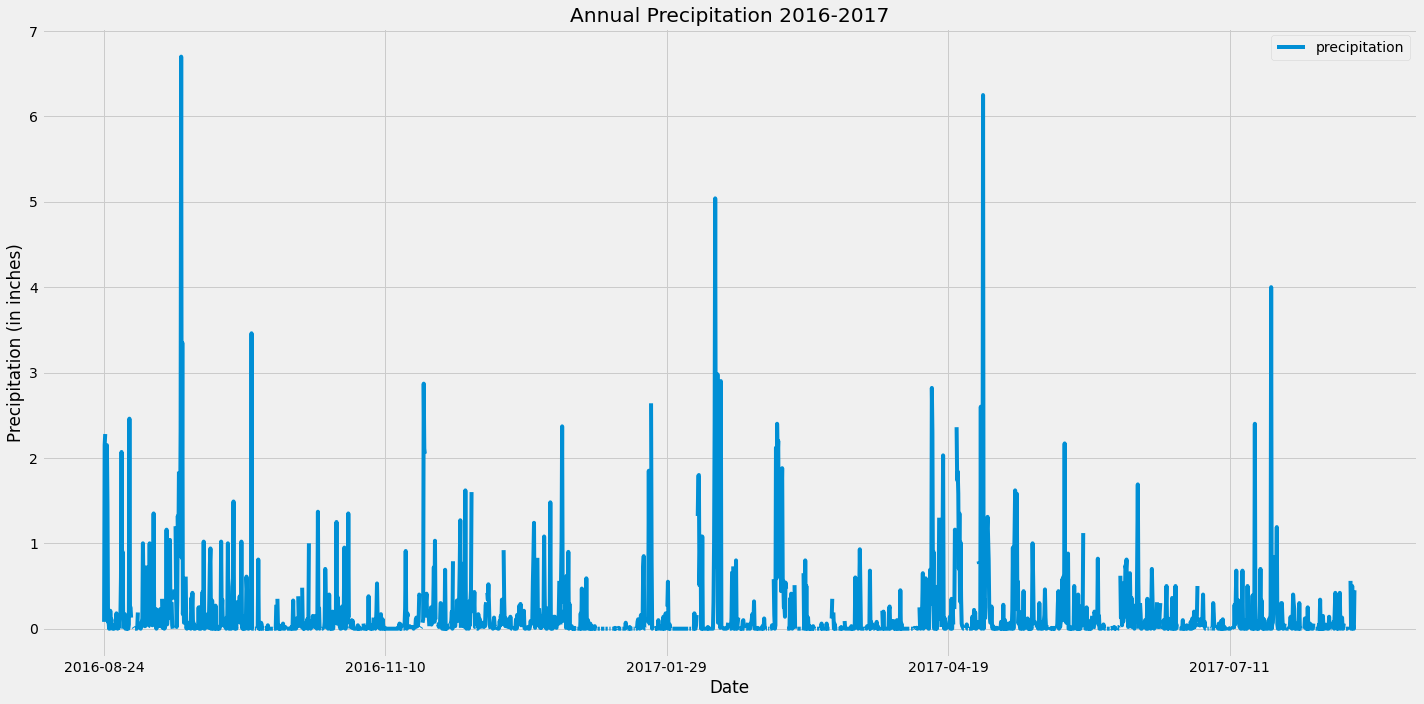

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.

last_12_months = dt.date(2017,8,23) - dt.timedelta(days=365)
print(last_12_months)

# Perform a query to retrieve the data and precipitation scores

year_precipitation = session.query(measurement.date, measurement.prcp).\
        filter(measurement.date >= '2016-08-24', measurement.date <= '2017-08-23').\
        order_by(measurement.date).all()
year_precipitation


# Save the query results as a Pandas DataFrame and set the index to the date column

year_precipitation_df = pd.DataFrame(year_precipitation, columns = ['date', 'precipitation'])

# Set "date" as index
year_precipitation_df.set_index('date', inplace = True)


# Sort the dataframe by date
year_precipitation_df = year_precipitation_df.sort_values(by='date')
year_precipitation_df.head()


# Use Pandas Plotting with Matplotlib to plot the data

fig, ax = plt.subplots(figsize = (20, 10))
year_precipitation_df.plot(ax = ax, x_compat = True)

ax.set_xlabel("Date")
ax.set_ylabel("Precipitation (in inches)")
ax.set_title("Annual Precipitation 2016-2017")


plt.tight_layout()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_precipitation_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.id).distinct().count()
station_count

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations =(session.query(measurement.station, func.count(measurement.station))
                        .group_by(measurement.station)
                        .order_by(func.count(measurement.station).desc())
                        .all())
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'


temp_stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == most_active_station).all()

temp_stats

print(f' The Max temp is 85.0, the Min temp is 54.0, and the Avg is 71.664')

 The Max temp is 85.0, the Min temp is 54.0, and the Avg is 71.664


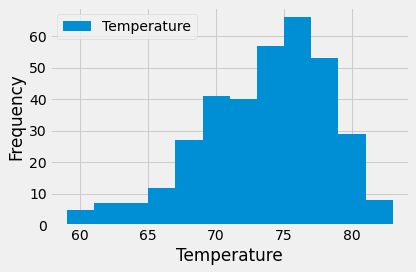

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

yearly_temp = session.query(measurement.date, measurement.tobs).filter(measurement.station == most_active_station).\
    filter(func.strftime("%Y-%m-%d", measurement.date) >= dt.date(2016, 8, 23)).all()

yearly_temp_df = pd.DataFrame(yearly_temp, columns = ['Date', 'Temperature'])

fig, ax = plt.subplots()
yearly_temp_df.plot.hist(bins = 12, ax = ax)


ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')

plt.tight_layout()


# Close session

In [ ]:
# Close Session
session.close()